# Using Partial Dependence Plots in ML to Measure Feature Importance 

### Brian Griner

April 14, 2018 (**updated April 22, 2018 to include PDPBox examples**)

Princeton Public Library, Princeton NJ 

![title](http://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_002.png)

***
## Outline
1. Problem Statement - How can we better understand Cause and Effect between inputs and outputs when using a complex machine learning or deep learning algorithm?

2. Feature Importance - What is _Importance_? How do we measure it?

- Linear models
- Machine learning algorithms
- Ensembles
- Neural Networks
      
3. Partial Dependence Plots
      i. Linear models
      ii. Machine learning algorithms
      iii. Ensembles
      iv. Neural Networks

4. Case study - Diabetes Risk Factors


Links for Partial Dependence Plots

https://stats.stackexchange.com/questions/233396/partial-dependence-plot-interpretation

http://ask.skytree.net/question/12/partial-dependence-plots/

Research

[Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation
Alex Goldstein∗, Adam Kapelner†, Justin Bleich‡, and Emil Pitkin§
The Wharton School of the University of Pennsylvania](https://arxiv.org/pdf/1309.6392.pdf)


## The problem with using ML algorithms in business 

A. ML algorithms are hard to explain to your internal clients. "Gradient Boosting what??? Oh, I get it. You used A.I., right?"

B. Many business problems require interpretation of model results (especially when the answer is the opposite of what the CEO wants it to be). Some examples in commercial analytics include:

- What are the key drivers of new customer aquisition?
- Which marketing promotions are driving business performance?
- Is there a mix of promotional channels that will maximize my return on promotional spend?
- How much should I spend on each promotional channel; i.e. what is the media mix?
- Why is the forecast 20 percent lower than last year?
- What can I do to make it 20 percent higher than last year? That is our mandate from the CEO.

C. The connection between "cause" and "effect" in ML algorithms can be complicated or impossible to determine analytically. For example, using the gradients of a multilayer neural network or computing the marginal effects of the inputs from an ensemble learning algorithm.
***
## Feature Importance

In machine learning, feature importance is one way to understand the relative performace of an input. A simple explanation of how feature importance is determined in machine learning is **to examine the change in out of sample predictive accuracy when each one of the inputs is changed.**

Some basic examples using the Pima Indians diabetes from UCI ML repository is presented below.

Index(['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class'], dtype='object')
Accuracy on training set: 1.000
Accuracy on test set: 0.714
Accuracy on training set: 0.773
Accuracy on test set: 0.740

Decision Tree Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


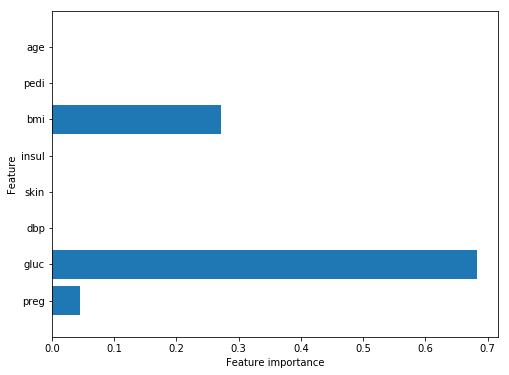

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#diabetes = pd.read_csv('pima-indians-diabetes.data.csv')
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class']
diabetes = pd.read_csv(filename, names=names)

print(diabetes.columns)
diabetes.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'class'], diabetes['class'], stratify=diabetes['class'], random_state=66)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

print("")
print("Decision Tree Feature importances:\n{}".format(tree.feature_importances_))

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('Decision Tree feature_importance')




Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.786

Random Forest - Max Depth = 3
Accuracy on training set: 0.800
Accuracy on test set: 0.755

Random Forest Feature Importance


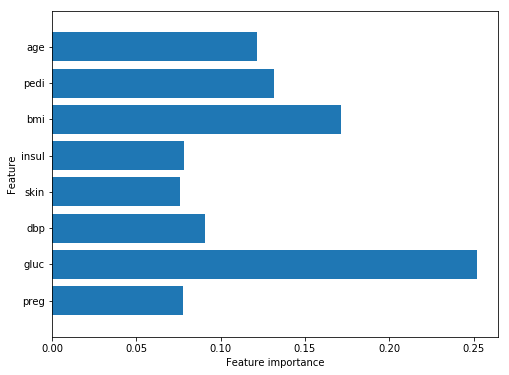

In [2]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("")
print('Random Forest')
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("")
print('Random Forest - Max Depth = 3')
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

print("")
print('Random Forest Feature Importance')
plot_feature_importances_diabetes(rf)

## Partial Dependence Plots
To identify the influence of individual risk factors in the GBM algorithm, the model prediction graphed over the input domain while averaging the other model predictors. This graph is called a **partial dependence plot**.

The python code used for the partial dependence plots was adapted from [scikit-learn's example program using partial dependence plots.](http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html#sphx-glr-auto-examples-ensemble-plot-partial-dependence-py)

An example adapted from "DanB" on Kaggle shows a simple example using the Melbourne Housing Data.

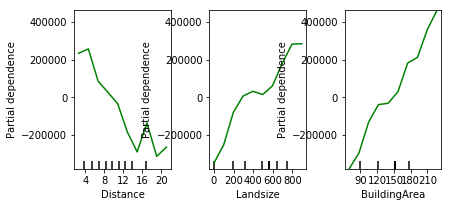

In [3]:
# Partial Dependence Plots - adapted from Dan B NB on Kaggle()
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

def get_some_data():
    cols_to_use = ['Distance', 'Landsize', 'BuildingArea']
    data = pd.read_csv('melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

## Case Study: Partial Dependence Plots for Identifying Pre-Diabetes Risk Factors

### Gradient Boosting Machine
To examine the relative importance of different risk factors in pre-diabetes, I will use a Gradient Boosting Machine (GBM). GBM and ensemble version, eXtreme Gradient Boosting (XGBoost) have been referred to as one of the most power learning ideas in machine learning [(Hastie T, Tibshirani R, Friedman J. Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd edition. New York (NY): Springer-Verlag; 2009. Chapter 16, Ensemble Learning; p. 605-624)](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf).

The learning concept behind boosting and additive trees is that a set of weaker models can be combined into a committee of experts that greatly improves prediction accuracy. GBM is a sequence of simple models that are weighted and summed together to form the committee of experts used for prediction. Each model in the GBM sequence is tasked with predicting the error of the model that preceeds it.

Automatically created module for IPython interactive environment
   preg   gluc   dbp       skin       insul   bmi   pedi   age  class
0   6.0  148.0  72.0  35.000000  165.475260  33.6  0.627  50.0    1.0
1   1.0   85.0  66.0  29.000000   62.304286  26.6  0.351  31.0    0.0
2   8.0  183.0  64.0  20.078082  210.991380  23.3  0.672  32.0    1.0
3   1.0   89.0  66.0  23.000000   94.000000  28.1  0.167  21.0    0.0
4   0.0  137.0  40.0  35.000000  168.000000  43.1  2.288  33.0    1.0
(768, 8)
Training GBRT...
 done.
done in 0.090s
[0.06689852 0.19068358 0.06909436 0.09518029 0.15086463 0.15034195
 0.19511133 0.08182534]
Custom 3d plot via ``partial_dependence``


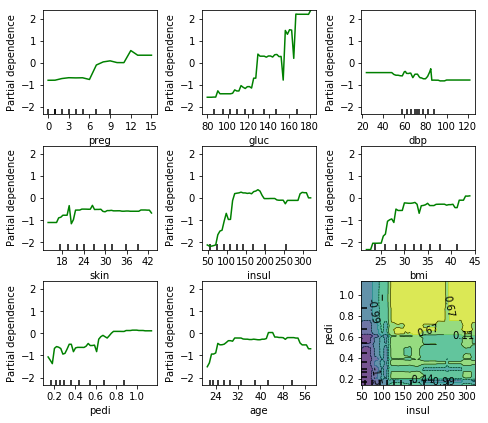

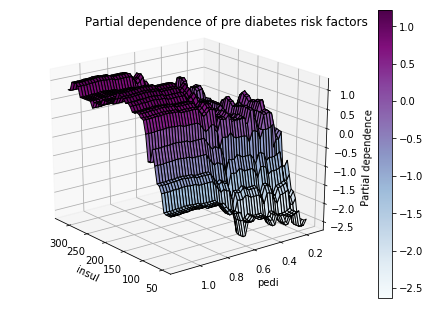

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)


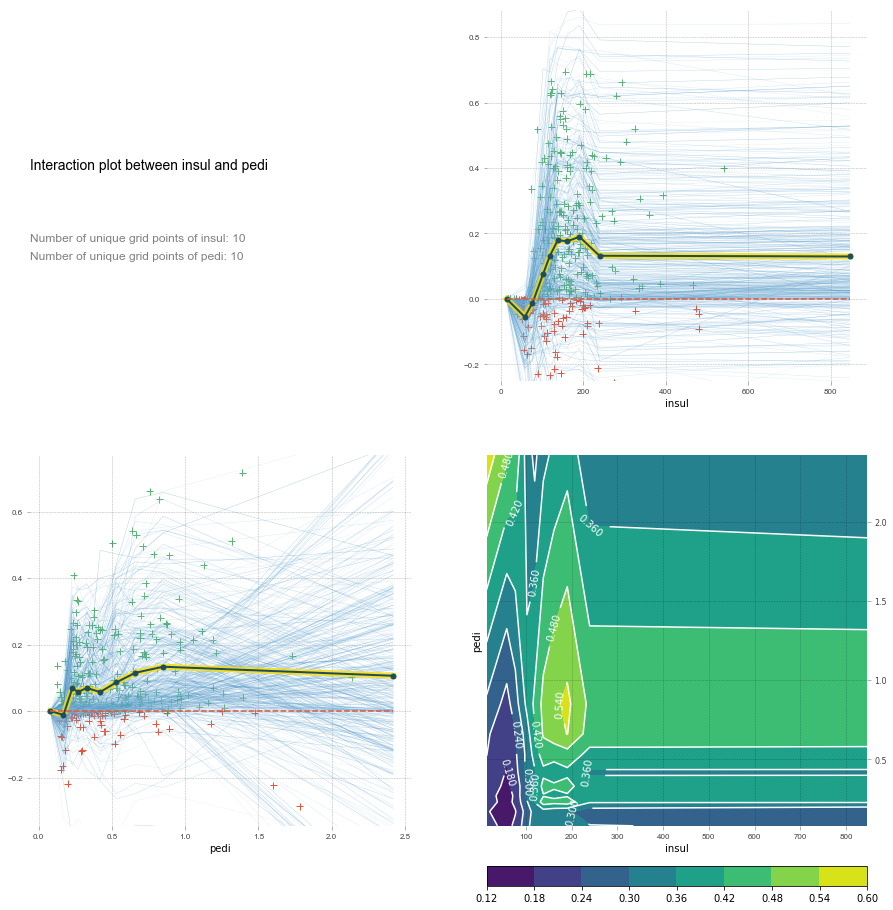

In [4]:
from pandas import read_csv, DataFrame
import numpy as np
filename = "ln_skin_ln_insulin_imp_data.csv"
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age', 'class']
dataset = read_csv(filename, names=names)
# Compute ratio of insulin to glucose 
#dataset['ratio'] = dataset['insul']/dataset['gluc']

from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from time import time

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

# split dataset into inputs and outputs
print(dataset.head())

values = dataset.values
X = values[:,0:8]
print(X.shape)
y = values[:,8]
#print(y.shape)

#def main():

    # split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)
names = ['preg', 'gluc', 'dbp', 'skin', 'insul', 'bmi', 'pedi', 'age']

print("Training GBRT...")
model = GradientBoostingClassifier(n_estimators=100, max_depth=4,learning_rate=0.1, loss='deviance',random_state=1)
t0 = time()
model.fit(X_train, y_train)
print(" done.")
    
print("done in %0.3fs" % (time() - t0))
importances = model.feature_importances_
    
print(importances)

#print('Convenience plot with ``partial_dependence_plots``')

features = [0, 1, 2, 3, 4, 5, 6, 7, (4,6)]
fig, axs = plot_partial_dependence(model, X_train, features,feature_names=names,n_jobs=3, grid_resolution=50)
#fig.suptitle('Partial dependence plots of pre diabetes on risk factors')
            
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4)  # tight_layout causes overlap with suptitle

    
print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (4, 6)
pdp, axes = partial_dependence(model, target_feature,X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=142)
plt.colorbar(surf)
plt.suptitle('Partial dependence of pre diabetes risk factors')
                 
plt.subplots_adjust(right=1,top=.9)

plt.show()
    
    # Needed on Windows because plot_partial_dependence uses multiprocessing
#if __name__ == '__main__':
#    main()

# check model
print(model)

# import dump / load sklearn libs
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
#import pickle

# save model to disk
filename = 'model.sav'
#pickle.
dump(model, filename)

# load model from disk
interact_insul_pedi = load(filename)
#pickle.load(filename)

# test pdpbox
import pdpbox
from pdpbox import pdp
pdp_pedi_insul = pdp.pdp_interact(interact_insul_pedi,dataset[names],['insul','pedi'])
pdp.pdp_interact_plot(pdp_pedi_insul, ['insul','pedi'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#pdp.pdp_plot(pdp_diab,'insul')

### PDPBox Partial Dependence Plot for Random Forest Classifier


Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.812

Random Forest - Max Depth = 3
Accuracy on training set: 0.805
Accuracy on test set: 0.766

Random Forest Feature Importance


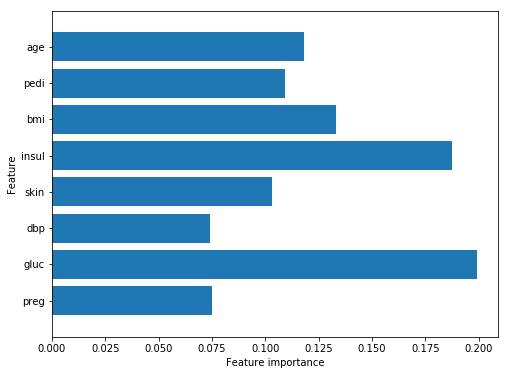

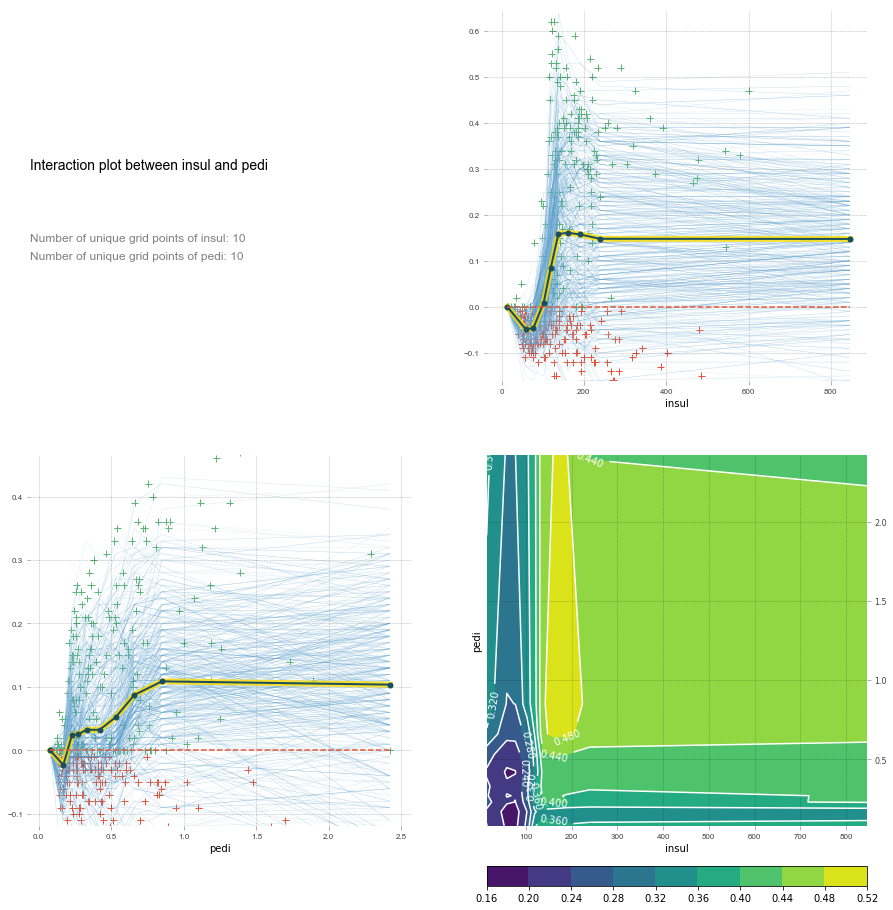

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("")
print('Random Forest')
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("")
print('Random Forest - Max Depth = 3')
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

print("")
print('Random Forest Feature Importance')
plot_feature_importances_diabetes(rf)


# import dump / load sklearn libs
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
#import pickle

# save model to disk
filename = 'model.sav'
#pickle.
dump(rf, filename)

# load model from disk
rf = load(filename)
#pickle.load(filename)

# test pdpbox
import pdpbox
from pdpbox import pdp
pdp_pedi_insul = pdp.pdp_interact(rf,dataset[names],['insul','pedi'])
pdp.pdp_interact_plot(pdp_pedi_insul, ['insul','pedi'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#pdp.pdp_plot(pdp_diab,'insul')

Links for Partial Dependence Plots

https://stats.stackexchange.com/questions/233396/partial-dependence-plot-interpretation

http://ask.skytree.net/question/12/partial-dependence-plots/

Research

[Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation
Alex Goldstein∗, Adam Kapelner†, Justin Bleich‡, and Emil Pitkin§
The Wharton School of the University of Pennsylvania](https://arxiv.org/pdf/1309.6392.pdf)

### Note on using PDPBox with Scikit-learn:
PDPBox installs from pip10 and higher. Easiest way use PDPBox is to create a virtual environment and install it there. 

In anaconda:

conda create --pdp_env

source activate pdp_env (Windows - activate pdp_env)

pip install --upgrade pip

pip install pdpbox

[See this blog post for installing a python virtualenv](http://timsherratt.org/digital-heritage-handbook/docs/python-pip-virtualenv/)